In [1]:
#imports go here

from sage.plot.polygon import Polygon
from sage.plot.colors import rainbow

In [40]:
def add_points (a, b):
    return

# Note: This returns a graphics object. To get the actual polygon object, you must index into the return value at [0].
def construct_chair_primitive_tile (origin, orientation, color) -> Polygon:
    primitive_points = [(0,0), (2,0), (2,1), (1,1), (1,2), (0,2)]
    tile = polygon([(origin[0] + orientation[0] * p[0], origin[1] + orientation[1] * p[1]) for p in primitive_points], 
                   rgbcolor=color, edgecolor='black', fill=true)
    return tile

# To show the individual subtiles, we need to plot them each, so we need one graphics polygon that has a list of 
# each of the primitive tiles. To know the scale of the next supertile, we only need to keep track of that 
# tile's size. So, to make an L_n supertile, we take in 
# 1) the size of the tile
# 2) the origin of the tile (i.e. which corner is oppposite the missing chunk)
# 3) the orientation of the tile (given as a tuple of (+/- 1, +/- 1))
# 4) color
def construct_chair_supertile (size, origin, orientation, color) -> Polygon:
    #Now, we can start to construct the supertile. We want to combine four of the L_(n-1) tile.    
    if (size < 2):
        print(f"Invalid input size of {size}.")
        return
    if (size == 2):
        # This is our base case. We have a primitive tile, and we need to just plot it.
        return construct_chair_primitive_tile (origin, orientation, color)

    g = Graphics()

    #We have a supertile with n>0. This means we must use recursion to plot the tile.
    newsize = size // 2

    g += construct_chair_supertile (newsize, origin, orientation, color)
    g += construct_chair_supertile (newsize,
                                (origin[0] + orientation[0] * newsize / 2, origin[1] + orientation[1] * newsize / 2),
                                orientation,
                                color)
    g += construct_chair_supertile (newsize,
                                (origin[0] + orientation[0] * size, origin[1]),
                                (-1 * orientation[0], orientation[1]),
                                color)
    g += construct_chair_supertile (newsize,
                                (origin[0], origin[1] + orientation[1] * size),
                                (orientation[0], -1 * orientation[1]),
                                color)
    return g


def construct_chair_tiling (iterations):
    # rbow = rainbow(iterations)
    
    for i in range (iterations):
        g = construct_chair_supertile (2 ** (1+i), (0,0), (1,1), 'white')
        show(g)

    return

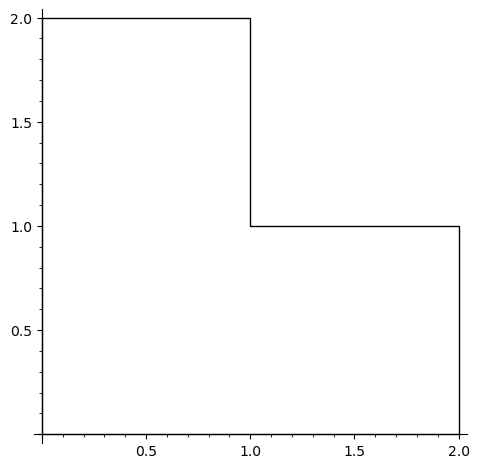

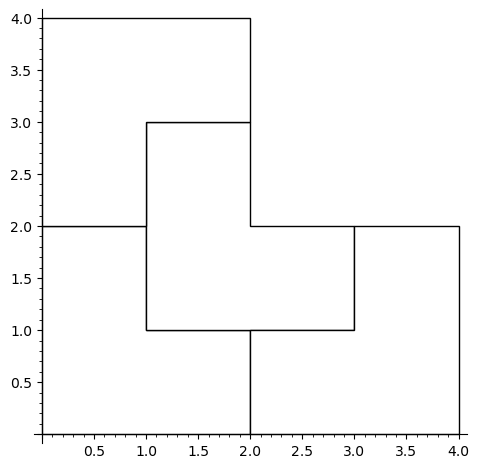

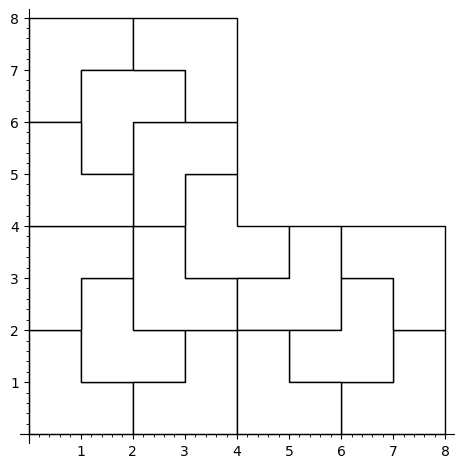

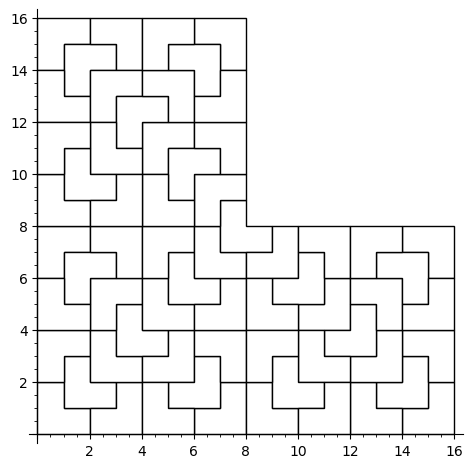

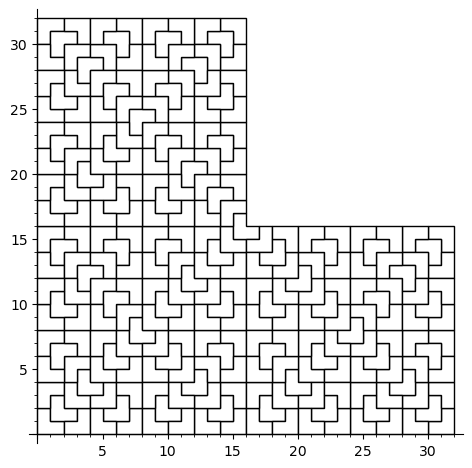

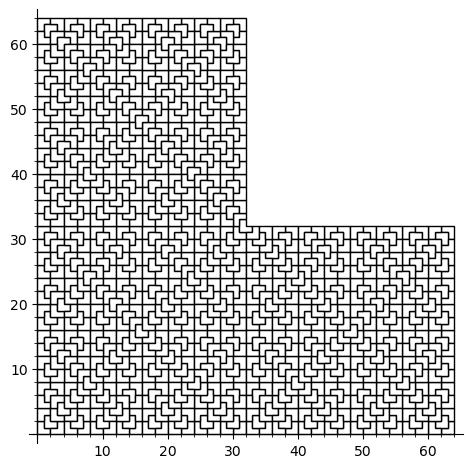

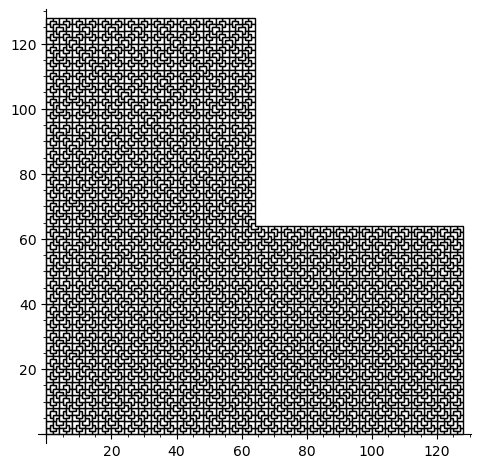

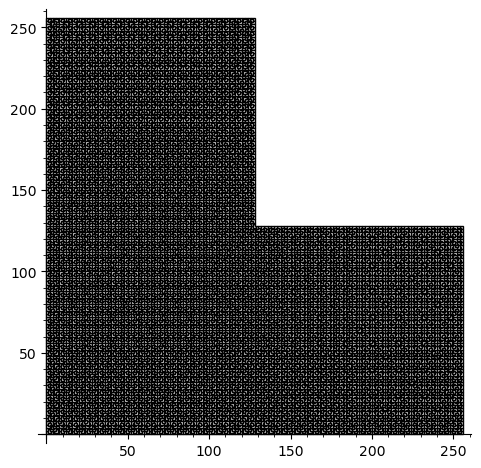

KeyboardInterrupt: 

In [43]:
Ln = construct_chair_tiling(10)
Ln

In [ ]:
# Stays the same
points1 = [(0,0), (2,0), (2,1), (1,1), (1,2), (0,2)]

# Right shift by 2*tile length and horizontal reflection
rtile_origin = (4,0)
points2 = [(rtile_origin[0] - po[0], rtile_origin[1] + po[1]) for po in points1]

# Upwards shift by 2*tile length and vertical reflection
ltile_origin = (0,4)
points3 = [(ltile_origin[0] + po[0], ltile_origin[1] - po[1]) for po in points1]

# Right and upwards shift by 1/2 * tile length
utile_origin = (1,1)
points4 = [(utile_origin[0] + po[0], utile_origin[1] + po[1]) for po in points1]

p1 = polygon(points1, edgecolor='black')
p = p1

p2 = polygon(points2, edgecolor='black')
p += p2

p3 = polygon(points3, edgecolor='black')
p += p3

p4 = polygon(points4, edgecolor='black')
p += p4

show(p)